In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visualizar dados
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [5]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [7]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [10]:
dataset['Temperatura'].describe()


count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

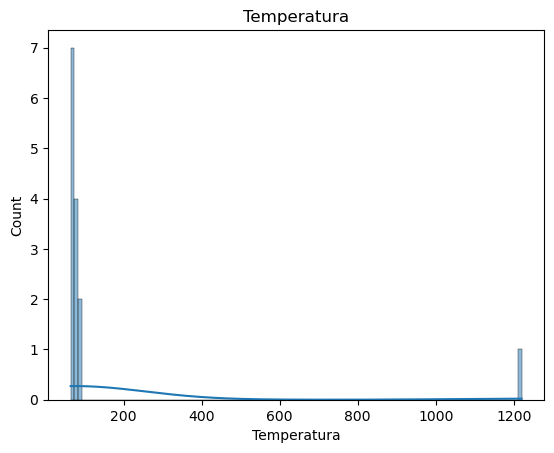

In [19]:
srn.histplot(dataset['Temperatura'], kde=True).set_title('Temperatura')

In [20]:
dataset.loc[dataset['Temperatura'] > 130]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [22]:
mediana = sts.median(dataset['Temperatura'])
mediana

82.5

In [26]:
dataset.loc[dataset['Temperatura'] > 130] = mediana
dataset.loc[dataset['Temperatura'] > 130]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [31]:
Agrupado = dataset.groupby(['Umidade']).size()
Agrupado

Umidade
65.0     1
70.0     3
73.5     1
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
200.0    1
dtype: int64

In [32]:
dataset.loc[dataset['Umidade'] > 100] = mediana
dataset.loc[dataset['Umidade'] > 100]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [33]:
Agrupado = dataset.groupby(['Umidade']).size()
Agrupado

Umidade
65.0    1
70.0    3
73.5    1
75.0    1
80.0    1
82.5    1
85.0    1
86.0    1
90.0    2
91.0    1
dtype: int64

In [43]:
dataset['Umidade'].isnull().sum()




0

In [40]:
dataset['Umidade'].fillna(mediana, inplace = True)

In [41]:
dataset['Umidade'].isnull().sum()

0

In [44]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
73.5    1
82.5    1
nao     4
sim     8
dtype: int64

In [46]:
dataset.loc[dataset['Jogar'].isin ( ['73.5', '82.5']), 'Jogar'] = "sim"
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
73.5    1
82.5    1
nao     4
sim     8
dtype: int64